# Car Price Prediction Project

# Importing the Important Dependencies

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Processing

In [5]:
# loading the data from csv file to pandas dataframe
car_dataset= pd.read_csv('car data.csv')

In [6]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [8]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# checking the missing values
car_dataset.isnull()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False


In [10]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# checking the distribution of categorical data (data with certain categories)
print(car_dataset.Fuel_Type.value_counts())
print()
print(car_dataset.Seller_Type.value_counts())
print()
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding categorical data (change the categorical data to certain values)

In [12]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
car_dataset.head() #(checkim=ng that encoding is correct or not)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the Data and Target

In [14]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)  
Y = car_dataset['Selling_Price']                                 # Selling_Price becomes our target

In [15]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting Training and Test data

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2) 
 #test_size=0.1 means 10% of data is test data and 90% data is training data

# Model Training

# 1.) Linear Regression

In [18]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train,Y_train)    #fit our data into the linear regression

LinearRegression()

# Model Evaluation

In [20]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [21]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)     

R squared Error :  0.87994516604937


# Visualize the actual prices and Predicted prices

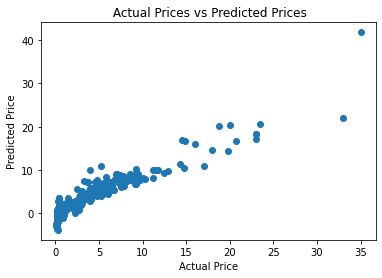

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [23]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)


In [24]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715025409


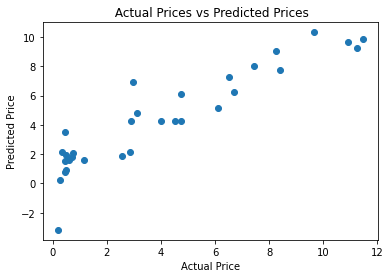

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# 2.) Lasso Regression

In [26]:
# loading the linear regression model
lass_reg_model = Lasso()

In [27]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

# Model Evaluation

In [28]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


# Visualize the actual prices and Predicted prices

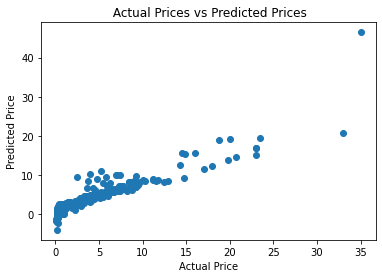

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [31]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [32]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


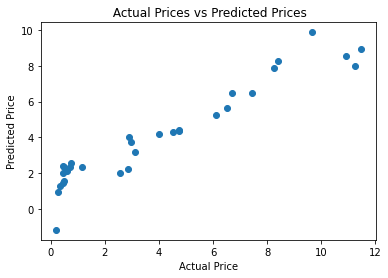

In [33]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Perform Exploratory Data Analysis (EDA)

# 1.) Univariate Analysis

# a. Distribution of the Target Variable (Selling_Price)

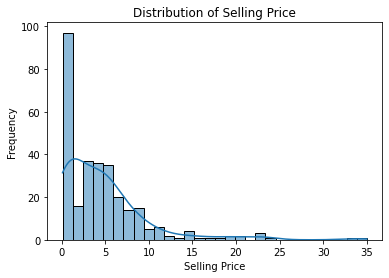

In [34]:
sns.histplot(car_dataset['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

# b. Distribution of Numerical Features

In [35]:
# You can visualize the distribution of other numerical features like Present_Price, Kms_Driven, Year, etc.

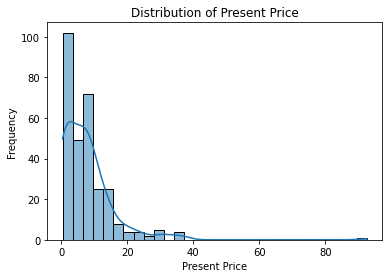

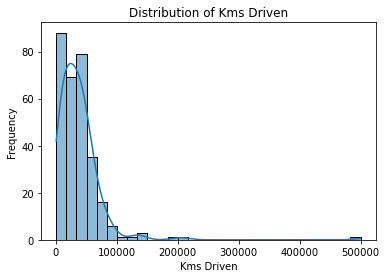

In [36]:
# Distribution of Present_Price
sns.histplot(car_dataset['Present_Price'], kde=True, bins=30)
plt.title('Distribution of Present Price')
plt.xlabel('Present Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of Kms_Driven
sns.histplot(car_dataset['Kms_Driven'], kde=True, bins=30)
plt.title('Distribution of Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.show()


# 2.) Bivariate Analysis

# a. Scatter Plot between Present_Price and Selling_Price

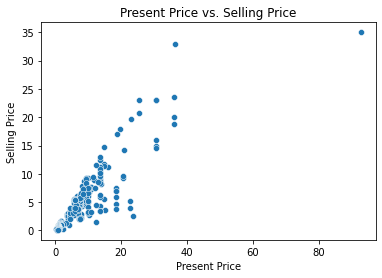

In [37]:
sns.scatterplot(x=car_dataset['Present_Price'], y=car_dataset['Selling_Price'])
plt.title('Present Price vs. Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

# b. Box Plots for Categorical Features

In [38]:
# Box plots help in understanding the distribution of Selling_Price across different categories (e.g., Fuel_Type, Seller_Type, Transmission).

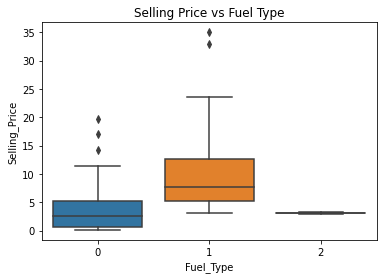

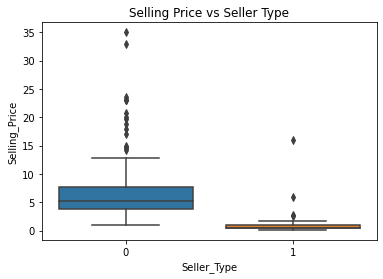

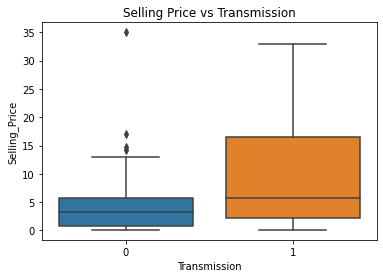

In [39]:
# Box plot for Fuel_Type
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_dataset)
plt.title('Selling Price vs Fuel Type')
plt.show()

# Box plot for Seller_Type
sns.boxplot(x='Seller_Type', y='Selling_Price', data=car_dataset)
plt.title('Selling Price vs Seller Type')
plt.show()

# Box plot for Transmission
sns.boxplot(x='Transmission', y='Selling_Price', data=car_dataset)
plt.title('Selling Price vs Transmission')
plt.show()


# 3.) Correlation Analysis

In [40]:
# This helps to understand the relationships between different features and identify multicollinearity.

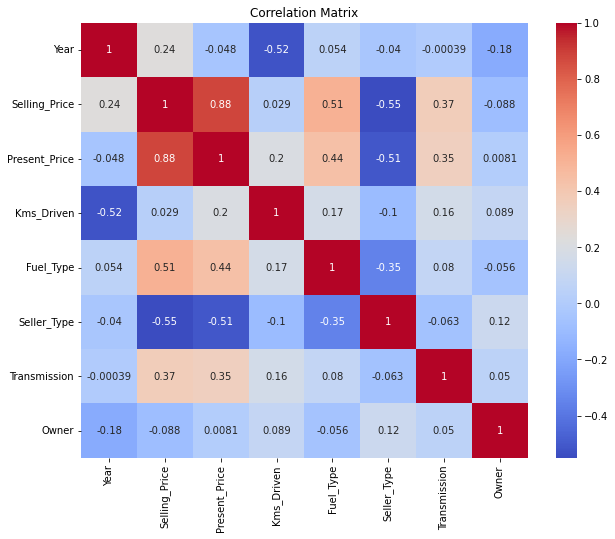

In [41]:
# Correlation matrix
corr_matrix = car_dataset.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 4.) Outlier Detection

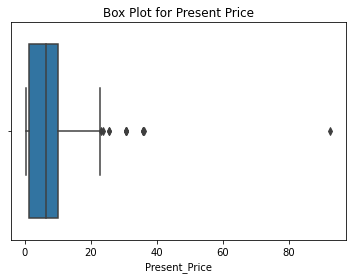

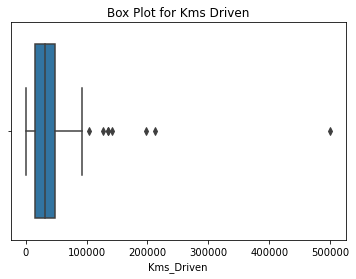

In [42]:
# Box Plots to Detect Outliers

# Box plot for Present_Price
sns.boxplot(car_dataset['Present_Price'])
plt.title('Box Plot for Present Price')
plt.show()

# Box plot for Kms_Driven
sns.boxplot(car_dataset['Kms_Driven'])
plt.title('Box Plot for Kms Driven')
plt.show()


In [43]:
# Now we can proceed with the Decision Tree and Random Forest models !

# Decision Tree Regressor

In [44]:
#  Importing Required Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [45]:
# Training the Decision Tree Model

# Instantiate the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [46]:
# Evaluating the Decision Tree Model

# Make predictions
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

# Evaluate performance
print("Decision Tree Performance:")
print("Training R^2:", r2_score(Y_train, dt_train_pred))
print("Test R^2:", r2_score(Y_test, dt_test_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(Y_test, dt_test_pred))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(Y_test, dt_test_pred)))


Decision Tree Performance:
Training R^2: 1.0
Test R^2: 0.9525784699755273
Mean Absolute Error (Test): 0.4600000000000001
Root Mean Squared Error (Test): 0.7898836173970555


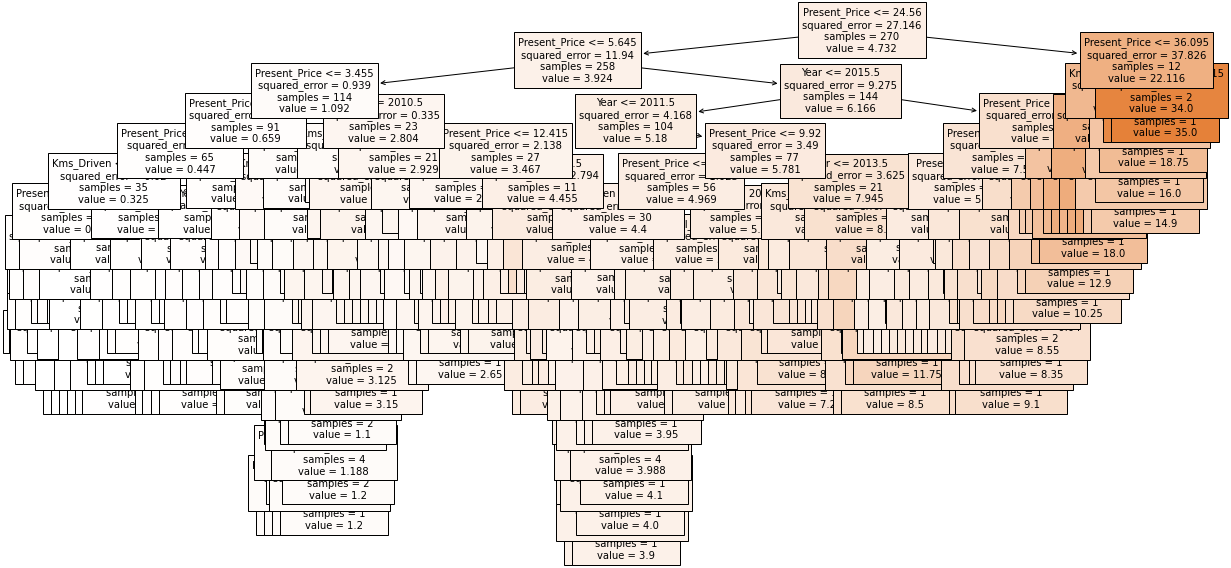

In [47]:
# Visualizing the Decision Tree
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

In [48]:
# Evaluating performance
print("Decision Tree Performance:")
print("Training R^2:", r2_score(Y_train, dt_train_pred))  # R^2 score for training data
print("Test R^2:", r2_score(Y_test, dt_test_pred))        # R^2 score for test data
print("Mean Absolute Error (Test):", mean_absolute_error(Y_test, dt_test_pred))  # MAE for test data
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(Y_test, dt_test_pred)))  # RMSE for test data

Decision Tree Performance:
Training R^2: 1.0
Test R^2: 0.9525784699755273
Mean Absolute Error (Test): 0.4600000000000001
Root Mean Squared Error (Test): 0.7898836173970555


# Random Forest Regressor

In [49]:
#  Importing Required Libraries
from sklearn.ensemble import RandomForestRegressor

In [50]:
# Training the random forest model

# Instantiate the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [51]:
# Evaluating the Random Forest Model

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print("Training R^2:", r2_score(Y_train, rf_train_pred))
print("Test R^2:", r2_score(Y_test, rf_test_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(Y_test, rf_test_pred))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(Y_test, rf_test_pred)))


Random Forest Performance:
Training R^2: 0.9856337653136535
Test R^2: 0.9805517643053386
Mean Absolute Error (Test): 0.3423
Root Mean Squared Error (Test): 0.50584263363224


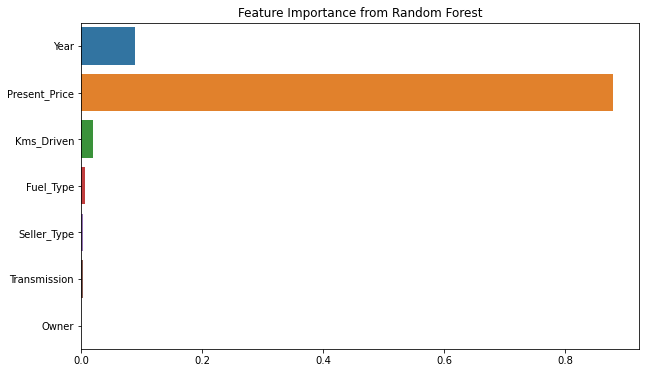

In [52]:
# Get feature importances
importance = rf_model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=X.columns)
plt.title('Feature Importance from Random Forest')
plt.show()

In [53]:
# Evaluating performance
print("Random Forest Performance:")
print("Training R^2:", r2_score(Y_train, rf_train_pred))  # R^2 score for training data
print("Test R^2:", r2_score(Y_test, rf_test_pred))        # R^2 score for test data
print("Mean Absolute Error (Test):", mean_absolute_error(Y_test, rf_test_pred))  # MAE for test data
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(Y_test, rf_test_pred)))  # RMSE for test data

Random Forest Performance:
Training R^2: 0.9856337653136535
Test R^2: 0.9805517643053386
Mean Absolute Error (Test): 0.3423
Root Mean Squared Error (Test): 0.50584263363224


# Hyperparameter Tuning

In [54]:
# Hyperparameters are the settings or parameters that you configure before the learning process begins.
# The purpose of hyperparameter tuning is to find the optimal set of hyperparameters that allow your model to perform the best on your data.

In [55]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the training data
grid_search.fit(X_train, Y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
rf_test_pred_best = best_rf_model.predict(X_test)
print("Best Random Forest R^2:", r2_score(Y_test, rf_test_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest R^2: 0.979590817821835


# Cross-Validation

In [56]:
# Cross-validation is a technique for assessing how a machine learning model will generalize to an independent dataset.
# The primary purpose of cross-validation is to ensure that the model is not overfitting to the training data and will perform well on unseen data.

In [57]:
# Implement k-fold cross-validation to get a more robust estimate of model performance.
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=10)
print("Cross-validated R^2:", cv_scores.mean())

Cross-validated R^2: 0.9148093958849817
